Keyword arguments {'use_auth_token': True} are not expected by StableDiffusionPipeline and will be ignored.
100%|██████████| 50/50 [00:18<00:00,  2.73it/s]


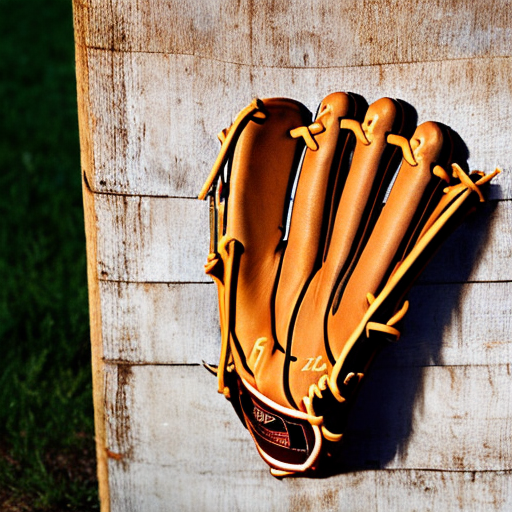

In [2]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '6'
from scripts.models.diffuserpipeline import StableDiffusionPipeline
import random
import numpy as np
import torch

def set_seed(seed: int) -> torch.Generator:
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    gen = torch.Generator(device='cuda')
    gen.manual_seed(seed)

prompt= "The baseball glove waits by the fence."
model_id = 'stabilityai/stable-diffusion-2-base'
device = 'cuda'
seed = 0 

pipe = StableDiffusionPipeline.from_pretrained(model_id, use_auth_token=True).to(device)

with torch.no_grad():
    out = pipe(prompt=prompt, generator=set_seed(seed))
    out.images[0].show()
    
    